<a href="https://colab.research.google.com/github/julianmoreno1123/Analitica-de-datos/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Lectura de archivo y librerías a usar

Integrantes

Jhonatan Styven Rodriguez Reyes

Julián Esteban Moreno Grajales




Base de datos: 

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv

In [1]:
###Importación de librerias 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Version de las librerias 
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

Python 3.7.15
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2


In [3]:
df = pd.read_csv('Life Expectancy Data.csv') #Cargar datos de un cvs a un Dataframe

Los pasos que realizaremos en el trabajo seran:

-Entendimiento del negocio.

-Entendimiento de los datos.

-Preparación de los datos.

-Modelado.


### 1.1. Resumen

**La esperanza de vida** es el promedio de años que se espera que viva una persona, esta se calcula a partir de la tasa de mortalidad de determinada población. Los patrones de mortalidad suelen variar a medida que pasan los años.

Este dataframe, se centra en el estudio el cual tiene factores de inmunizacion, factores de mortalidad, facrores económicos, factores sociales y otros factores relacionados con la salud, este conjunto de datos se pone a disposición del publico con el fin de analizar los datos en 193 paises. 

Con ayuda de la estadistica y la programacion, analizaremos este dataframe, para ver cuales de los factores propuestos están mas correlacionados con la esperanza de vida.

Los pasos a seguir en este trabajo seran el entendimiento de la base de datos, el entendimiento de los datos, la preparación de los datos, el modelo matematico y le avaluacion del modelo. 

###1.2 ¿Que es Pandas?

Pandas de PAnel DAta es una libreria de software libre en phyton basada en numphy, especializada para la manipulación y analisis de datos, ésta ofrece operaciones para manipular tablas numéricas, séries de tiempo y estructura de datos. Altamente optimizada en rendimiento con caminos de código escritos en Cython o C tiene como características más usadas van desde tipos de dataframe para manipulación de datos con indexación integrada hasta operaciones tabulares como relleno de datos, uniones de tablas, reestructursción y segmentación de datos, entre otros
  

Panel data o datos de panel es un término de econometría que designa datos que combinan una dimensión temporal con otra dimensión transversal.

###1.3 ¿Que es NumPy?

Para empezar Num-Py significa numerical python, este es una de los paquetes fundmentales para una computación cientifica, uno de los objetos mas potentes son los arrays, que a terminos basicos se pueden entender como una matriz; en ellos las operaciones son mas directas y faciles e realizar ademas de que se pueden aplicar operaciones matematicas mas complejas como lo son transformaciones lineales o transformadas discrtas de fourier.
Grandes beneficios ya en el area programatica son, velocidad de ejecucion, consumo de memoria y agilidad en los calculos.

# 2. Entendimiento del proyecto

### 2.1. Resumen

In [4]:
df.columns #Comando para ver las columnas del dataframe.

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.head() #Se muestran las primeras cinco filas de nuestro DataFrame.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.info() #Información de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Los datos constan de 21 caracteristicas, 2938 registros, y variables de tipo texto y numérico.

Se realiza una descripcion de cada columna, con el comando value_counts(), este no se agrega con el fin de no extenderse en el código.

*`df['Nombrecolumna'].value_counts()`*

In [7]:
for var in df.columns:
  print(f'Valores posibles de {var}: {df[var].nunique()}')

Valores posibles de Country: 193
Valores posibles de Year: 16
Valores posibles de Status: 2
Valores posibles de Life expectancy : 362
Valores posibles de Adult Mortality: 425
Valores posibles de infant deaths: 209
Valores posibles de Alcohol: 1076
Valores posibles de percentage expenditure: 2328
Valores posibles de Hepatitis B: 87
Valores posibles de Measles : 958
Valores posibles de  BMI : 608
Valores posibles de under-five deaths : 252
Valores posibles de Polio: 73
Valores posibles de Total expenditure: 818
Valores posibles de Diphtheria : 81
Valores posibles de  HIV/AIDS: 200
Valores posibles de GDP: 2490
Valores posibles de Population: 2278
Valores posibles de  thinness  1-19 years: 200
Valores posibles de  thinness 5-9 years: 207
Valores posibles de Income composition of resources: 625
Valores posibles de Schooling: 173


0. Country: Pais de estudio (193 paises)
1. Year: Año de estudio, datos del año 2000 al 2015.
2. Status: Estado del pais, desarrollado o sub desarrollado.
3. Life expectancy: Esperanza de vida en edad.
4. Adult Mortality: Tasas de Mortalidad de Adultos de ambos sexos (probabilidad de morir entre los 15 y los 60 años por 1000 habitantes)
5. infant deaths: Número de muertes infantiles por cada 1000 habitantes
6. Alcohol: Alcohol, consumo per cápita registrado (mayores de 15 años) (en litros de alcohol puro). Este es un indicador preciso y confiable para monitorear las tendencias en el consumo de alcohol.
7. percentage expenditure: Gasto en salud como porcentaje del Producto Interno Bruto per cápita (%). Indicador que trata del gasto total en salud, dividido entre todos los habitantes.
8. Hepatitis B: Cobertura de vacunación contra la hepatitis B (HepB) entre los niños de 1 año (%) de población.
9. Measles: Sarampión - número de casos notificados por 1000 habitantes.
10. BMI: Índice de masa corporal promedio de toda la población.
11. under-five deaths: Número de muertes de menores de cinco años por cada 1000 habitantes
12. Polio: Cobertura de vacunación contra la poliomielitis (Pol3) entre los niños de 1 año (%) (La poliomielitis es una enfermedad muy contagiosa causada por un virus que invade el sistema nervioso y puede causar una parálisis total en cuestión de horas).
13. Total expenditure: Gasto del gobierno general en salud como porcentaje del gasto total del gobierno (%)
14. Diphtheria: Cobertura de inmunización con toxoide diftérico, tétanos y tos ferina (DTP3) entre los niños de 1 año (%).
15. HIV/AIDS: Muertes por cada 1000 nacidos vivos por VIH/SIDA, intervalo de edad (0-4 años)
16. GDP: Producto Interno Bruto per cápita (en USD). (Relación entre el valor total de todos los bienes y servicios finales generados durante un año por la economía de una nación o estado y el número de sus habitantes en ese año).
17. Population: Población del país.
18. thinness 10-19 years: Prevalencia de delgadez en niños y adolescentes de 10 a 19 años (%) (Obesidad).
19. thinness 5-9 years: Prevalencia de delgadez en niños y adolescentes de 5 a 9 años (%) (Obesidad).
20. Income composition of resources: Índice de Desarrollo Humano en términos de composición de ingresos de los recursos (índice que va de 0 a 1)
21. Schooling: Número de años de escolaridad (años)..



In [8]:
df.isnull().sum() #Conteo de datos faltantes por columnas.

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Se evidencia un alta cantidad de datos faltantes en algunas variables, lo cual se tratará en la preparacion de los datos.

Se responden las siguientes preguntas con el fin de entender mejor los datos propuestos: 

1. ¿Cuáles son las variables más relevantes y con mayor efecto para la esperanza de vida?
2. ¿Debería un país con un valor de esperanza de vida más bajo (<65) aumentar los años de escolaridad y el gasto total en servicios de salud para mejorar su esperanza de vida media?
3. ¿Cuál es el impacto de la cobertura de vacunación en la esperanza de vida?
4. ¿A medida que avanza el tiempo la esperanza de vida en los paises consultados a crecido o ha bajado?
5. ¿Se podría estimar la esperanza de vida futura usando alguna variable independiente? 

`Responderemos mas preguntas a lo largo del trabajo, pero estas seran las principales.`

# 3. Entendimiento de los datos

Procedemos con el metodo decribe de la biblioteca pandas que nos brinda información valiosa sobre las columnas en nuestro dataframe, en especifico centraremos nuestra atención en las columnas esperanza de vida, mortalidad adulta, porcentaje de gasto y escolaridad. las filas de este arreglo describen en cada ítem datos como: la media, el máximo y el mínimo entre otros, aspectos importantes a tener en cuenta al momento de analizar nuestros datos.


Este método retorna un dataframe que entre otra información incluye el número de muestras, el valor medio, la desviación estándar, el valor mínimo, máximo, la mediana y los valores correspondientes a los percentiles 25% y 75%.
la sintaxis es simple, primero va el nombre del dataframe seguido de un punto y la palabra reservada describe, para luego entre corchetes definir los parametros 

In [9]:
df.describe(percentiles=None, include=None, exclude=None)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


los parametos para este metodo son:

percentile: es una medida de posición usada en estadística, que nos muestra el valor de la variable por debajo del cual se encuentra un porcentaje dado, cuando tenemos los datos de observaciones ordenados de menor a mayor.

include: Es una lista de tipos de datos que se incluirán al describir el marco de datos. El valor predeterminado es nulo

exclude: 
Es una lista de tipos de datos que se excluirán al describir el marco de datos. El valor predeterminado es nulo


**Media**

La media o el promedio de un conjunto de datos se halla al sumar todos los números en el conjunto de datos y luego dividir este resultado entre el número de valores en el conjunto. 
$$\mu= \frac{1}{N}\sum_{i=1}^Nx_i$$
$$\bar{x}= \frac{1}{n}\sum_{i=1}^nx_i$$
Este numero debe cumplir que 



$$  min\{x_1.....x_n\}  	\leq	\widehat{x}\leq max\{x_1.....x_n\}$$
o que 
$$\widehat{x}=x_1 \hspace{2 cm}x_1=x_2=......x_n$$

**Mediana**

Es el valor medio cuando un conjunto de datos se ordena de menor a mayor.Para el cálculo de la mediana 
debemos clasisifcar el conjunto de datos en orden
hallar el termino medio, este valor es la mediana

**Moda**
 Es el número que se presenta con más frecuencia en un conjunto de datos.

**Desviación estándar** 

También conocida como desviación típica casi siempre esta respresentada de manera abreviada por la letra griega minúscula sigma σ o la letra s, así como por las siglas SD de standard deviation,  es una medida que se utiliza para cuantificar la variación o la dispersión de un conjunto de datos numéricos.

$$σ^2=\frac{\sum m^2f-\frac{(∑mf)^2}{N}}{N}$$
$$s^2=\frac{\sum m^2f-\frac{(∑mf)^2}{n}}{n-1}$$
Con $σ^2$ variacion de la población, $s^2$ variacion de la muestra y $m$ el punto medio del conjunto

Una desviación estándar baja indica que la mayor parte de los datos de una muestra tienden a estar agrupados cerca de su media (también denominada el valor esperado), mientras que una desviación estándar alta indica que los datos se extienden sobre un rango de valores más amplio.

En éste cuadro de texto se hará un análisis de la variable "life expectancy" o expectativa de vida, apartir de las medidas de muestreo en la tabla superior


En la característica de count podemos ver que recolectamos 2928 datos, "mean" o media por definicion sabemos que es acá donde tiende la mayor cantidad de datos, es decir en promedio la población mundial vivió 69.224932	entre el 2010 y el 2015, "std" o la desviación estandar es una medida que nos muestra qué tanto es la amplitud de la gráfica de disperción de datos, es decir que aunque la mayoría de paises tengan como esperanza de vida 69,2 existe un delta  al rededor del 69,2 donde delta es 9.523867 y ahí se aglomeraría aproximadamente el 75% de la información	 


Por otra parte podemos analizar que en esos años la menor esperanza de vida fue 36.3 y la mayor fue 89, otro análisis que podemos ver es que el primer cuarto de datos es menor o igual a 63,1, la mitad de los datos es menor o igual a 72.1y el último cuarto de datos es mayor o igual a 75,7.

#### 3.1. ¿Cual es el pais y el año con menor esperanza de vida?

In [10]:
minE = df['Life expectancy '].min()
minPais = df[df['Life expectancy ']==minE]['Country']
minaño = df[df['Life expectancy ']==minE]['Year']

In [11]:
print(f"El pais con menor esperanza de vida fue {minPais[1127]}, con {minE} años, en el año {minaño[1127]}.")

El pais con menor esperanza de vida fue Haiti, con 36.3 años, en el año 2010.


In [12]:
df_min = df.groupby('Country')
df_min = df_min.get_group('Haiti')

Text(0.5, 1.0, 'Esperanza de vida Haiti')

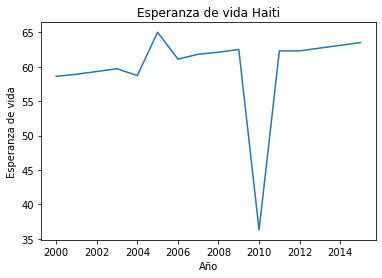

In [13]:
plt.plot(df_min['Year'],df_min['Life expectancy '])
plt.xlabel("Año")
plt.ylabel("Esperanza de vida")
plt.title('Esperanza de vida Haiti')

Haiti sufrió un terremoto en el año 2010. Esto provocó una disminución drastica en la esperanza de vida del país.


Podemos ver como este dato afecta a la tendencia normal que llevava la esperanza de vida, procederemos a quitarlo en la limpieza de datos porqué se considera un dato atipico.


####3.2. ¿Como fue el promedio de vida en todos los años? ¿Subió o bajó el promedio de vida a medida que pasaba el tiempo?

In [14]:
df_año = df[{'Year','Life expectancy '}] #Nuevo DataFrame con las dos columnas que nos interesan
df_año2 = df_año.groupby('Year').mean() #Agrupamos por año y sacamos los promedios de cada uno.

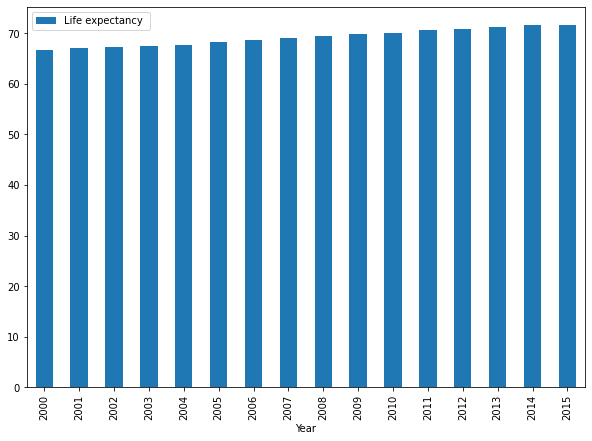

In [15]:
#Graficamos 
df_año2.plot(kind = 'bar', 
             figsize=(10,7)) #66.750273,71.61694

EL promedio de vida entre el año 2000 y 2015 si creció año tras año, el minimo de este fue 66.75 en el año 2000 y 71.61 en el año 2015.

#### 3.3. Gráficas de distribuciones.

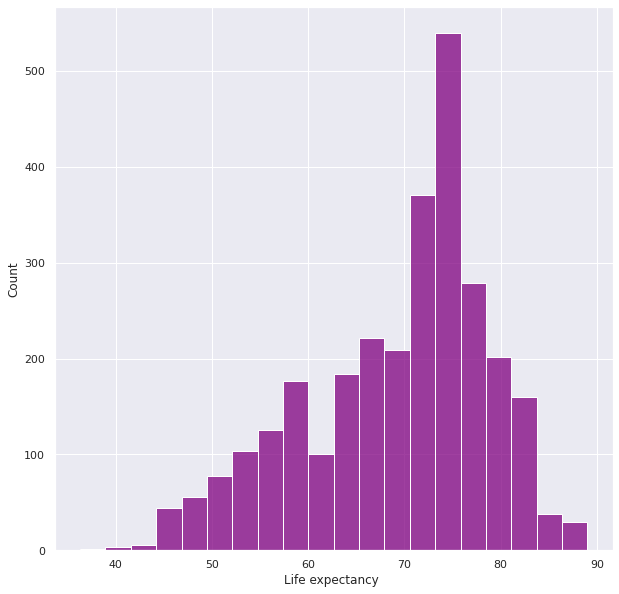

In [16]:
#Histograma esperanza de vida.
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.histplot(df['Life expectancy '],bins=20,color='purple')

Se observa una gran distribucion de los datos entre los 68 y 79 años.

Tambien se ve una baja distribución a los extremos del histograma, es decir una alta o baja espectativa de vida.

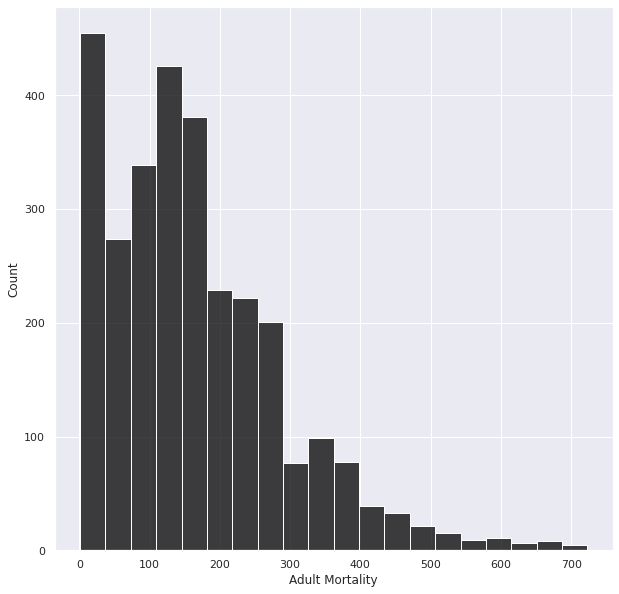

In [17]:
#Histograma mortalidad adulta.
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.histplot(df['Adult Mortality'],bins=20,color='black')

Esta columna tiene los datos de la tasa de mortalidad en adultos, la probabilidad de morir entre los 15 y 60 años de edad por 1000 habitantes,
Se observa en el histograma que en general, la mayoria de la poblacion de nuestro data frame, tuvo menos del 20% de probabilidades de morir entre los 15 y 60 años, tambien nos causa curiosidad ver como hubo paises que tenian entre el 60% y 70% de probabilidades de muerte

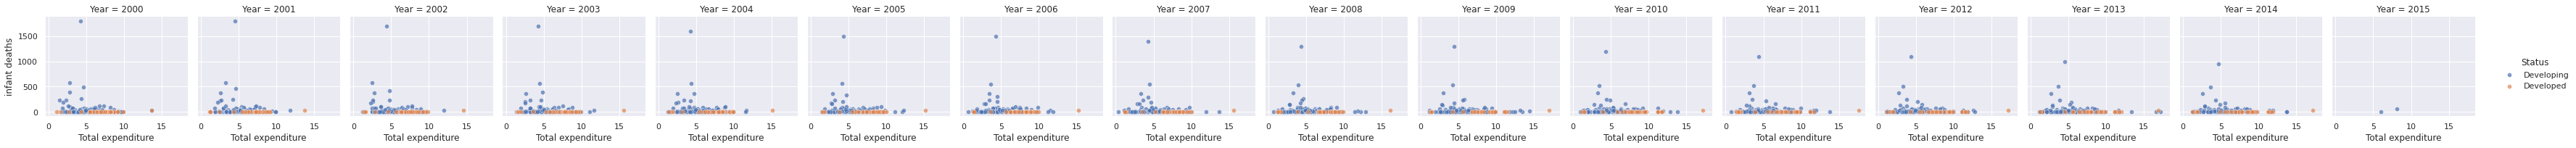

In [18]:
#Distribuciones por status 
g = sns.FacetGrid(df, col="Year", hue="Status")
g.map(sns.scatterplot, "Total expenditure", "infant deaths", alpha=.7)
g.add_legend()

En este diagrma hacemos una distribucion de los datos atravez del tiempo relacionando el gasto total en salud con el número de muertes infantiles por cada 1000 habitantes.

Usamos como uno de los criterios el status de desarollo de cada pais, es notable la diferencia entre los paices industrializados y los que estan en vias de desarollo, tambien podemos notar una tendencia para los datos entre el intervalo de 0 a 5 y una disminucion del numero de muertes infantiles con el pasar de los años. 

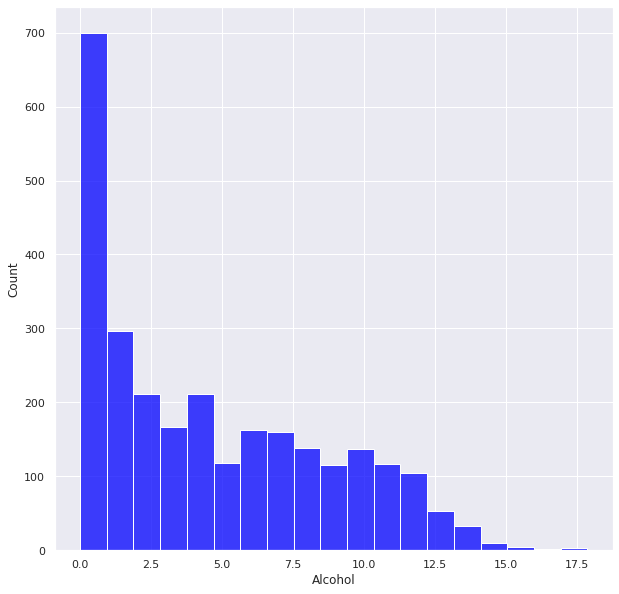

In [19]:
#Histograma alcohol
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.histplot(df['Alcohol'],color='blue')

En la distribución se ve mayor concentracion en numeros de litros menores a 2.5, sin embargo no se descartan los numeros mayores ya que es preocupante el consumo de alcohol en litros mayores a 5.

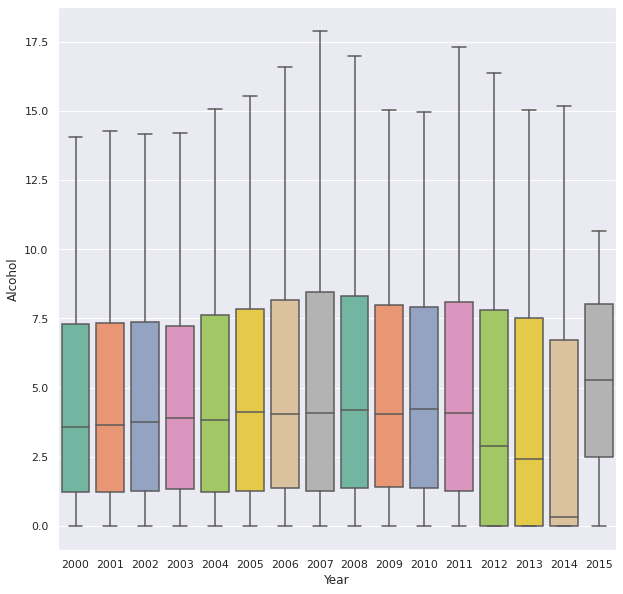

In [20]:
#Distribucion de alcohol por años.
plt.figure(figsize=(10,10))
sns.boxplot(x=df["Year"],
            y=df['Alcohol'],
            palette ='Set2')

Se observa que el consumo maximo de alcohol por litros fue en el 2007.

La mediana del año 2000 al 2007 se mantuvo con poca variavilidad, sin embargo en 2014 esta bajo considerablemente, pero en el siguiente año supero la mediana de los años anteriores.

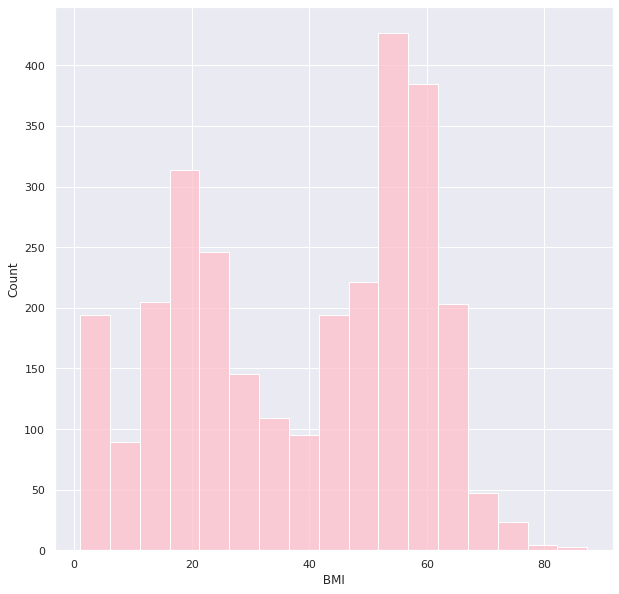

In [21]:
#Histograma indice de masa corporal.

plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.histplot(df[' BMI '],color='pink')

Índice de masa corporal promedio de toda la población es una razón matemática que asocia la masa y la talla del individuo. Se considera que si una persona tiene un IMC mayor a 30 esta en sobrepeso, y la mayoria de nuestra muestra se distribuye por vaores mayores a 30, lo cual no es logico porque no toda la poblacion esta en sobrepeso. 
Ahora bien, se puede considerar que este data frame es el peso promedio general de la poblacion.
Es preocupante ver como gran parte de nuestra muestra se distribuye por pesos menores a los 40kg.

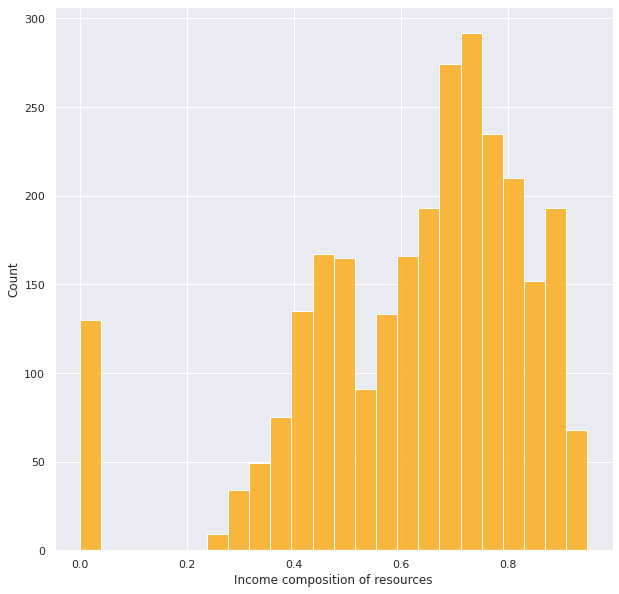

In [22]:
#Histograma indice de desarrollo humano.
plt.figure(figsize=(10,10))

sns.set(style="darkgrid")
sns.histplot(df['Income composition of resources'],color='orange')

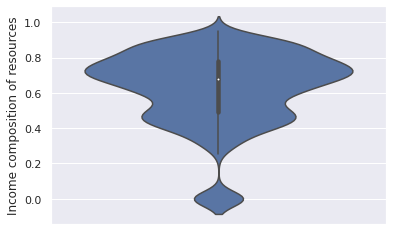

In [23]:
sns.violinplot(data=df, y='Income composition of resources')

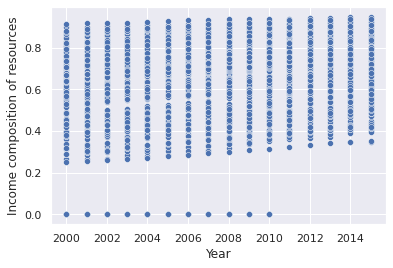

In [24]:
sns.scatterplot(data=df, x="Year", y="Income composition of resources")

el indice de desarrollo humano es un indicador  elaborado por el programa de naciones unidas para el desarrollo general de la poblacion. Se considera como un indice bajo si el indice se encuentra entre 0,350 y 0,549, ahora bien podemos ver en nuestro histograma que hay muestras por debajo de 0.350, los cuales se consideran datos atipicos, y los eliminaremos en la limpieza de datos, ya que no ayudan a realizar un analisis limpio.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

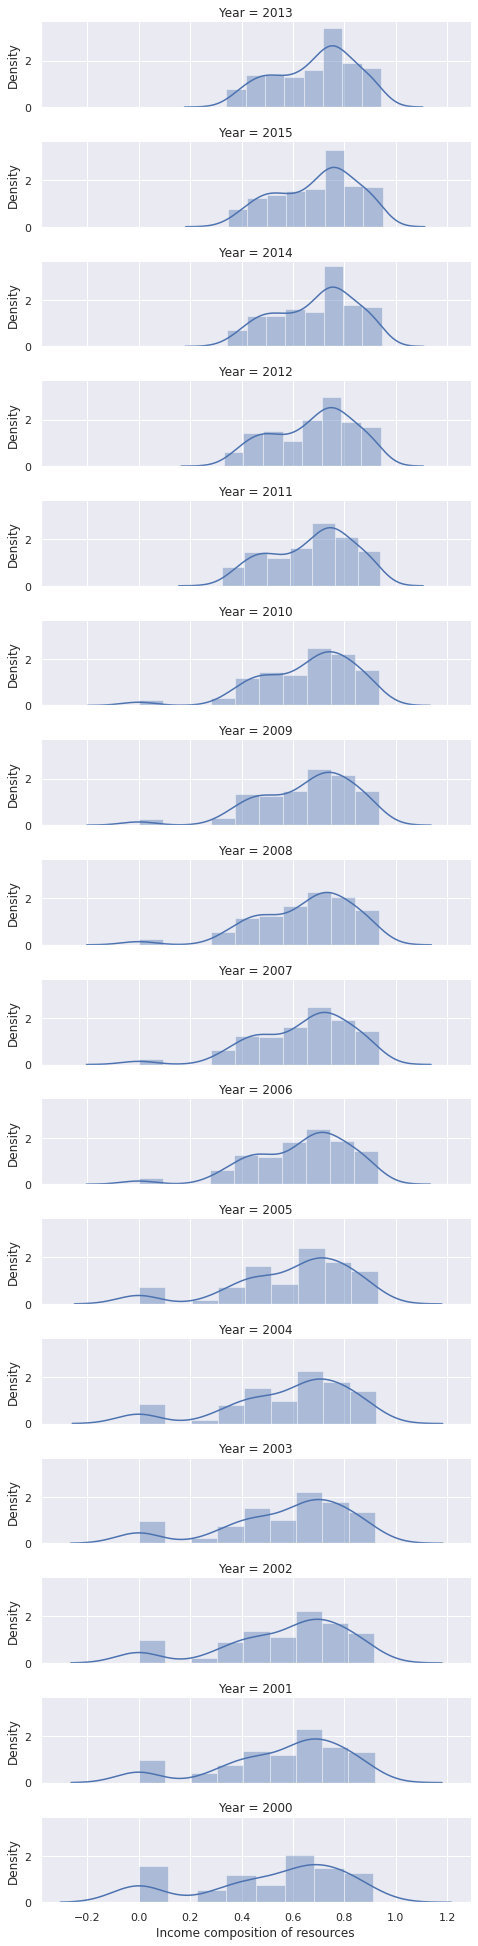

In [25]:
awa= df.Year.value_counts().index
g = sns.FacetGrid(df, row="Year", row_order=awa,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "Income composition of resources")

En el grafico anterior aproximamos la función de densidad de probabilidad subyacente que generaron los datos al agrupar y contar las observaciones,usando el algoritmo estimación de la densidad del kernel (KDE),produciendo una estimación de densidad continua, podemos notar un sesgo en los datos hacia 0.6.
 

## 3.4. Intervalos indice de desarrollo humano.

In [26]:
df_ds = df[{'Income composition of resources'}] #Nuebo DF con la columna de interes.

In [27]:
#Aplicamos el siguiente codigo para distribuir nuestros datos en 6 intervalos.
df_ds['Income composition of resources'] = pd.cut(df_ds["Income composition of resources"], bins=6)
df_ds = (df_ds.groupby("Income composition of resources").agg(frecuencia=("Income composition of resources", "count")).head(6))                                           
df_ds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,frecuencia
Income composition of resources,
"(-0.000948, 0.158]",130
"(0.158, 0.316]",45
"(0.316, 0.474]",428
"(0.474, 0.632]",558
"(0.632, 0.79]",995
"(0.79, 0.948]",615


In [28]:
#Agregamos la una columna de frecuencia, y restamos 167 al denominador
#segun los datos faltantes de la columna.
df_ds["frec_%"] = 100*df_ds["frecuencia"] / (len(df)-167)
df_ds 

,frecuencia,frec_%
Income composition of resources,,
"(-0.000948, 0.158]",130,4.691447
"(0.158, 0.316]",45,1.623962
"(0.316, 0.474]",428,15.445687
"(0.474, 0.632]",558,20.137135
"(0.632, 0.79]",995,35.907615
"(0.79, 0.948]",615,22.194154


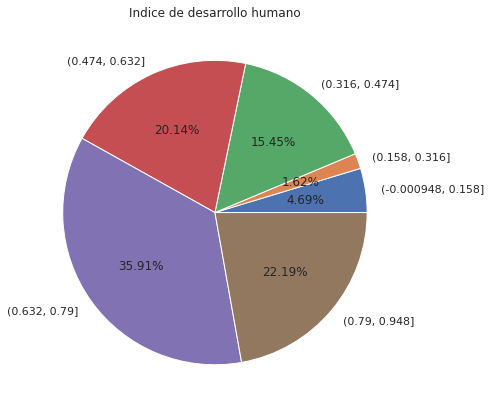

In [29]:
intervalos = ['(-0.000948, 0.158]','(0.158, 0.316]','(0.316, 0.474]','(0.474, 0.632]','(0.632, 0.79]','(0.79, 0.948]']
valores = df_ds['frecuencia']
plt.rcParams["figure.figsize"] = (7, 7)
plt.pie(x=valores, labels=intervalos, autopct='%1.2f%%')
plt.title('Indice de desarrollo humano')
plt.show()

De la grafica circular se puede deducir que el 22.79% de los datos estan asociados con un indice de desarrollo muy alto.

Se considera que tiene un desarrollo muy bajo si el indice es menor a 0.55, pero podemos ver que mas de la mitad se encuentran por lo menos con un indice mayor a este, es decir un indice medio o alto.